In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

# Caminho para o arquivo CSV
caminho_arquivo = 'Data/netflix_titles.csv'

# Carregar o arquivo CSV em um dataframe
df = pd.read_csv('Data/netflix_titles.csv')

# Exibir o dataframe
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
# Dropando colunas que não serão utilizadas
df = df.drop(columns=['type','cast','date_added','rating', 'country', 'director'])
df

,show_id,title,release_year,duration,listed_in,description
0,s1,Dick Johnson Is Dead,2020,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
8802,s8803,Zodiac,2007,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,2009,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Zoom,2006,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# Verificando valores nulos
df.isnull().sum()

show_id         0
title           0
release_year    0
duration        3
listed_in       0
description     0
dtype: int64

In [5]:
# Dropando valores nulos
df = df.dropna()

In [6]:
# Verificando valores nulos
df.isnull().sum()

show_id         0
title           0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
# Verificando valores duplicados
df.duplicated().sum()

0

# Pré-processamento dos Dados

In [8]:
# Função para limpar o texto
def limpar_texto(texto):
    # Converter o texto para minúsculo
    texto = texto.lower()
    # Remover caracteres especiais
    texto = re.sub(r'[^a-z0-9]', ' ', texto)
    return texto

# Aplicar a função de limpeza ao dataframe
df['description'] = df['description'].apply(limpar_texto)
df['description']

0       as her father nears the end of his life  filmm...
1       after crossing paths at a party  a cape town t...
2       to protect his family from a powerful drug lor...
3       feuds  flirtations and toilet talk go down amo...
4       in a city of coaching centers known to train i...
                              ...                        
8802    a political cartoonist  a crime reporter and a...
8803    while living alone in a spooky town  a young g...
8804    looking to survive in a world taken over by zo...
8805    dragged from civilian life  a former superhero...
8806    a scrappy but poor boy worms his way into a ty...
Name: description, Length: 8804, dtype: object

In [9]:
# Verificando se sobrou algum description nulo
df.isnull().sum()

show_id         0
title           0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# Criar uma máscara booleana para identificar linhas que contêm 'Season' ou 'Seasons' na coluna 'duration'
mask = df['duration'].str.contains(r'Season|Seasons', case=False)

# Dropar as linhas que correspondem à máscara
df = df[~mask]

# Exibir o DataFrame resultante
df

,show_id,title,release_year,duration,listed_in,description
0,s1,Dick Johnson Is Dead,2020,90 min,Documentaries,as her father nears the end of his life filmm...
6,s7,My Little Pony: A New Generation,2021,91 min,Children & Family Movies,equestria s divided but a bright eyed hero be...
7,s8,Sankofa,1993,125 min,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,s10,The Starling,2021,104 min,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,s13,Je Suis Karl,2021,127 min,"Dramas, International Movies",after most of her family is murdered in a terr...
...,...,...,...,...,...,...
8801,s8802,Zinzana,2015,96 min,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,s8803,Zodiac,2007,158 min,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,s8805,Zombieland,2009,88 min,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,s8806,Zoom,2006,88 min,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


In [11]:
# Remover a palavra 'min' dos valores na coluna 'duration'
df['duration'] = df['duration'].str.replace(r'\bmin\b', '', regex=True)

# Exibir o DataFrame resultante
df

,show_id,title,release_year,duration,listed_in,description
0,s1,Dick Johnson Is Dead,2020,90,Documentaries,as her father nears the end of his life filmm...
6,s7,My Little Pony: A New Generation,2021,91,Children & Family Movies,equestria s divided but a bright eyed hero be...
7,s8,Sankofa,1993,125,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,s10,The Starling,2021,104,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,s13,Je Suis Karl,2021,127,"Dramas, International Movies",after most of her family is murdered in a terr...
...,...,...,...,...,...,...
8801,s8802,Zinzana,2015,96,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,s8803,Zodiac,2007,158,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,s8805,Zombieland,2009,88,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,s8806,Zoom,2006,88,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


In [12]:
df['duration'] = df['duration'].apply(int)b
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6128 non-null   object
 1   title         6128 non-null   object
 2   release_year  6128 non-null   int64 
 3   duration      6128 non-null   int64 
 4   listed_in     6128 non-null   object
 5   description   6128 non-null   object
dtypes: int64(2), object(4)
memory usage: 335.1+ KB


In [29]:
df['duration'].head(10)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object

# Possíveis Analises e seus resultados

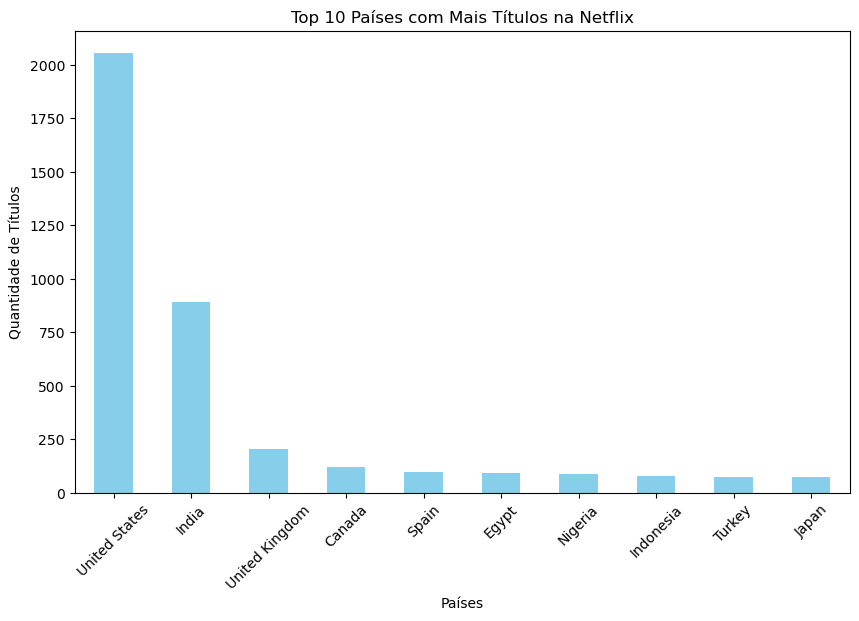

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar se a coluna 'country' está presente no dataframe
if 'country' in df.columns:
    # Dropar valores nulos na coluna 'country'
    df = df.dropna(subset=['country'])

    # Contar o número de títulos por país
    titulos_por_pais = df['country'].value_counts()

    # Visualizar a distribuição de títulos por país (os 10 principais países)
    top_10_paises = titulos_por_pais.head(10)
    top_10_paises.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Top 10 Países com Mais Títulos na Netflix')
    plt.xlabel('Países')
    plt.ylabel('Quantidade de Títulos')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("A coluna 'country' não foi encontrada no dataframe.")

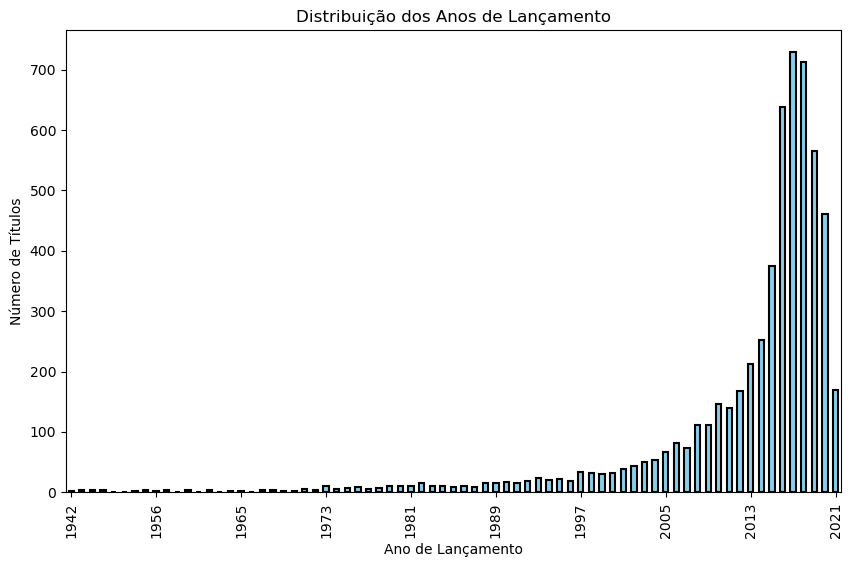

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição dos anos de lançamento
plt.figure(figsize=(10, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Distribuição dos Anos de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')

# Ajustar o espaçamento entre os valores do eixo x
plt.locator_params(axis='x', nbins=10)

plt.show()

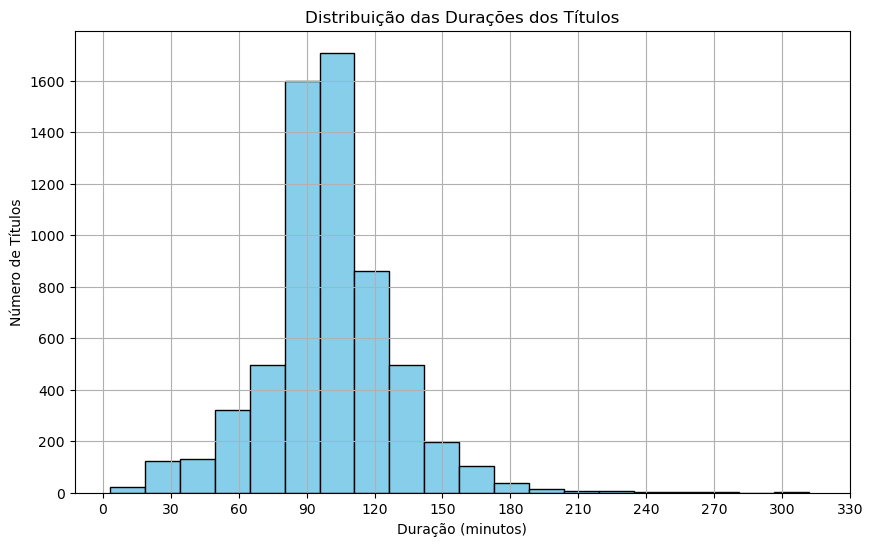

In [42]:
import numpy as np

# Visualizar a distribuição das durações usando um histograma
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição das Durações dos Títulos')
plt.xlabel('Duração (minutos)')
plt.ylabel('Número de Títulos')
plt.xticks(np.arange(0, max(df['duration'])+30, 30))  # Usando np.arange() para aceitar valores decimais
plt.grid(True)
plt.show()

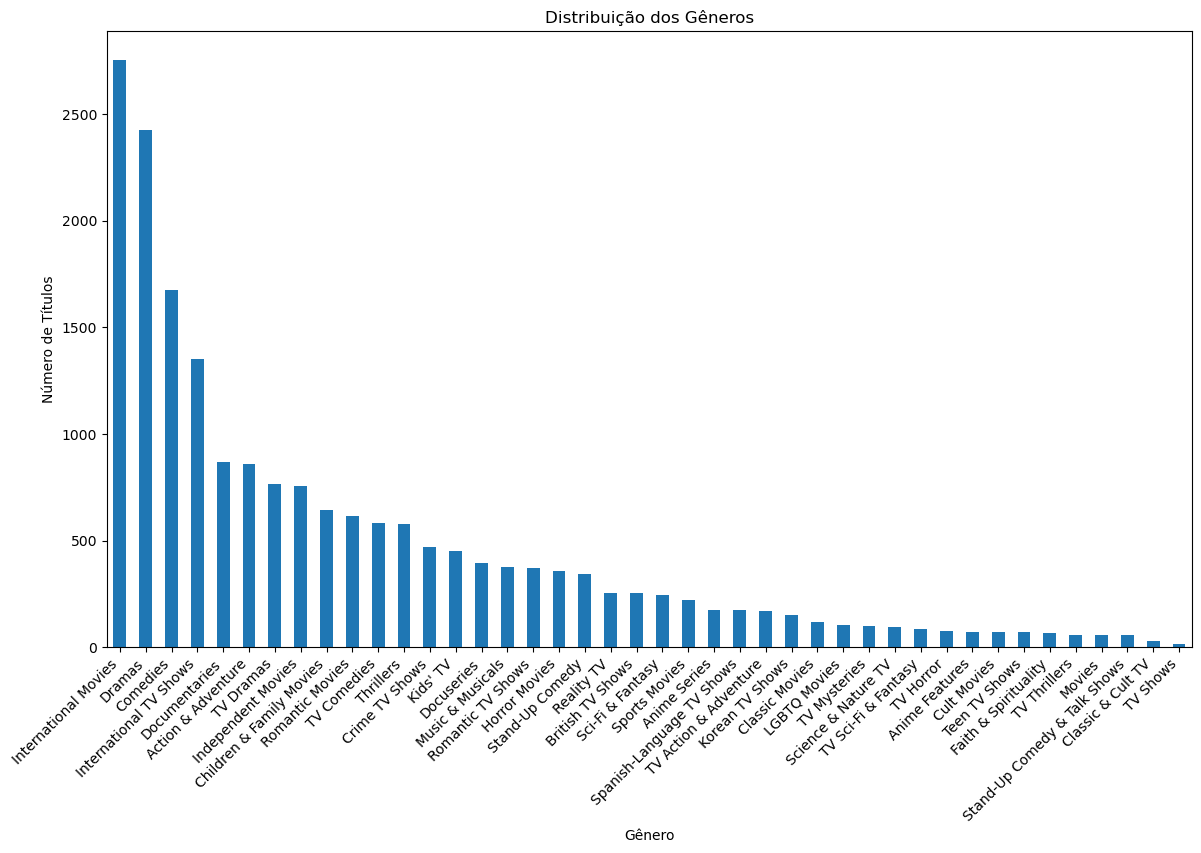

In [34]:
# Visualizar a distribuição dos gêneros
plt.figure(figsize=(14, 8))
generos = df['listed_in'].str.split(', ').explode()
generos.value_counts().plot(kind='bar')
plt.title('Distribuição dos Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.show()

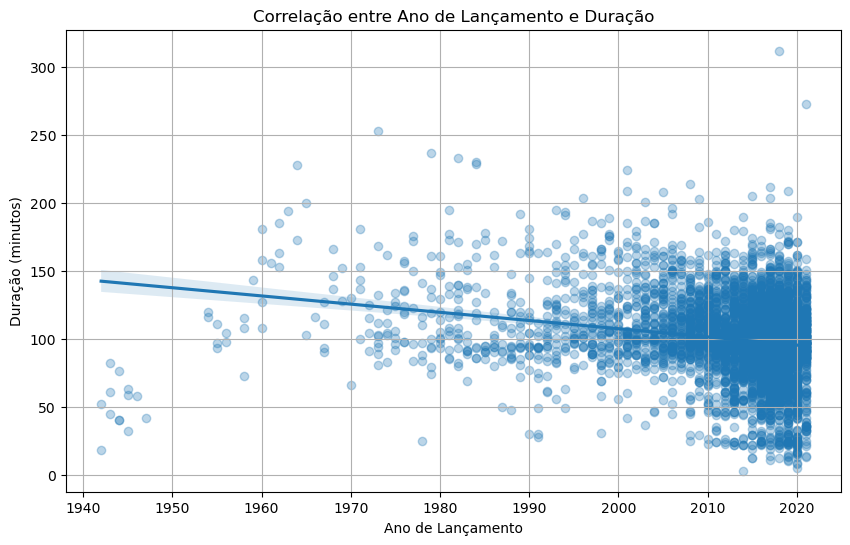

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna 'duration' para numérica (remover 'min')
df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')

# Remover os valores nulos na coluna 'duration'
df = df.dropna(subset=['duration'])

# Converter a coluna 'release_year' para numérica
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Remover os valores nulos na coluna 'release_year'
df = df.dropna(subset=['release_year'])

# Investigar a correlação entre ano de lançamento e duração dos títulos
plt.figure(figsize=(10, 6))
sns.regplot(x='release_year', y='duration', data=df, scatter_kws={'alpha':0.3})
plt.title('Correlação entre Ano de Lançamento e Duração')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.grid(True)
plt.show()

In [13]:
# Renomear todas as colunas de uma vez
df = df.rename(columns={
    'title': 'Titulo',
    'release_year': 'Ano',
    'duration': 'Minutagem',
    'listed_in': 'Genero',
    'description': 'Sinopse'
})

# Exibir o DataFrame resultante
df

,show_id,Titulo,Ano,Minutagem,Genero,Sinopse
0,s1,Dick Johnson Is Dead,2020,90,Documentaries,as her father nears the end of his life filmm...
6,s7,My Little Pony: A New Generation,2021,91,Children & Family Movies,equestria s divided but a bright eyed hero be...
7,s8,Sankofa,1993,125,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,s10,The Starling,2021,104,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,s13,Je Suis Karl,2021,127,"Dramas, International Movies",after most of her family is murdered in a terr...
...,...,...,...,...,...,...
8801,s8802,Zinzana,2015,96,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,s8803,Zodiac,2007,158,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,s8805,Zombieland,2009,88,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,s8806,Zoom,2006,88,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


# Analise Estatisctica e Graficos

In [14]:
# Resumo estatístico das colunas 'Ano' e 'Minutagem' com valores arredondados
df.describe().round(2)

,Ano,Minutagem
count,6128.00,6128.00
mean,2013.12,99.58
std,9.68,28.29
min,1942.00,3.00
25%,2012.00,87.00
50%,2016.00,98.00
75%,2018.00,114.00
max,2021.00,312.00


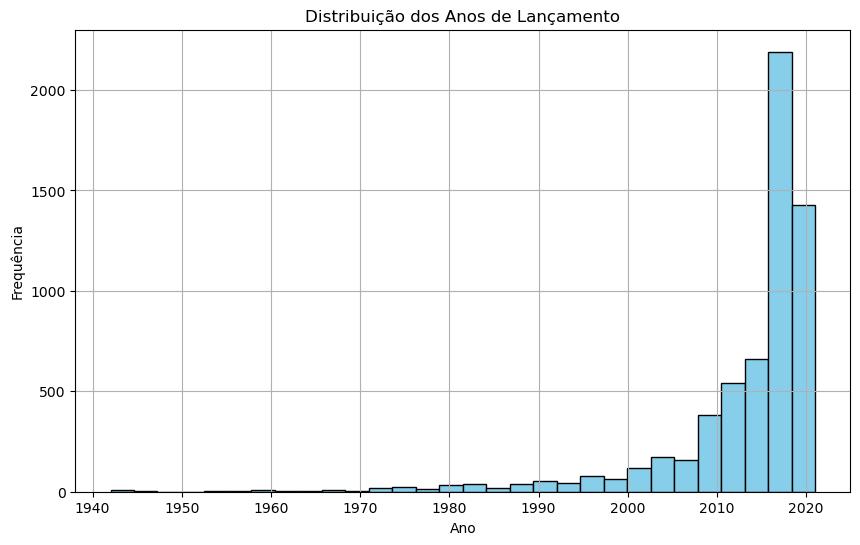

In [15]:
# Histograma da distribuição de anos
plt.figure(figsize=(10, 6))
plt.hist(df['Ano'].astype(int), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Anos de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

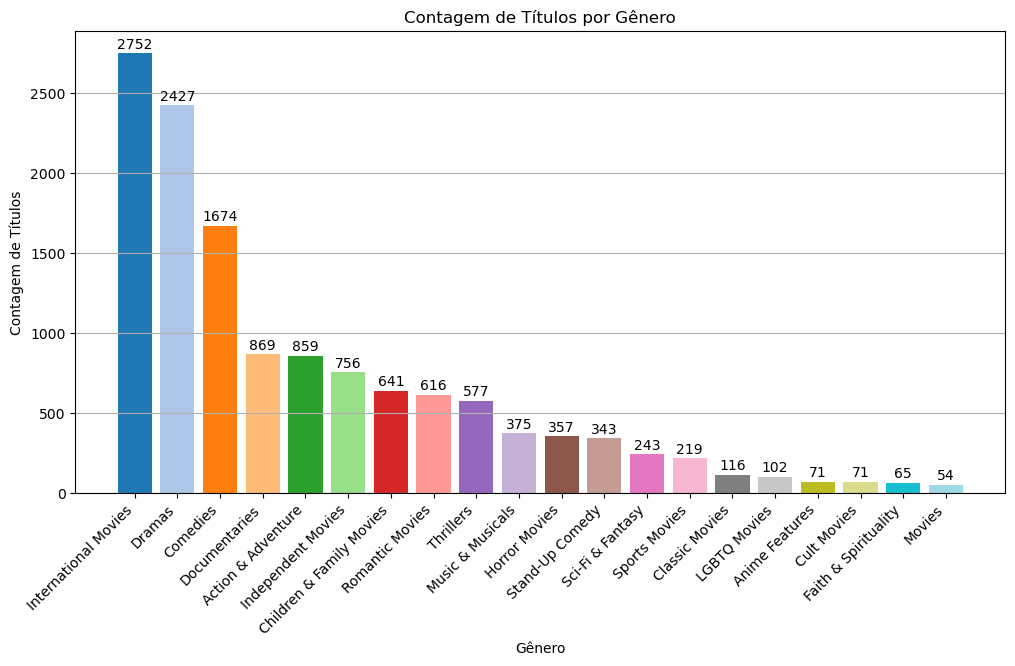

In [16]:
# Contagem de gêneros
genero_contagem = df['Genero'].str.split(', ', expand=True).stack().value_counts()

# Definir uma paleta de cores
cores = plt.cm.tab20.colors[:len(genero_contagem)]

# Gráfico de barras para contagem de gêneros
plt.figure(figsize=(12, 6))
bars = plt.bar(genero_contagem.index, genero_contagem.values, color=cores)
plt.title('Contagem de Títulos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Títulos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Adicionar o número de contagem acima das barras
for bar, contagem in zip(bars, genero_contagem.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, contagem, ha='center', va='bottom')

plt.show()

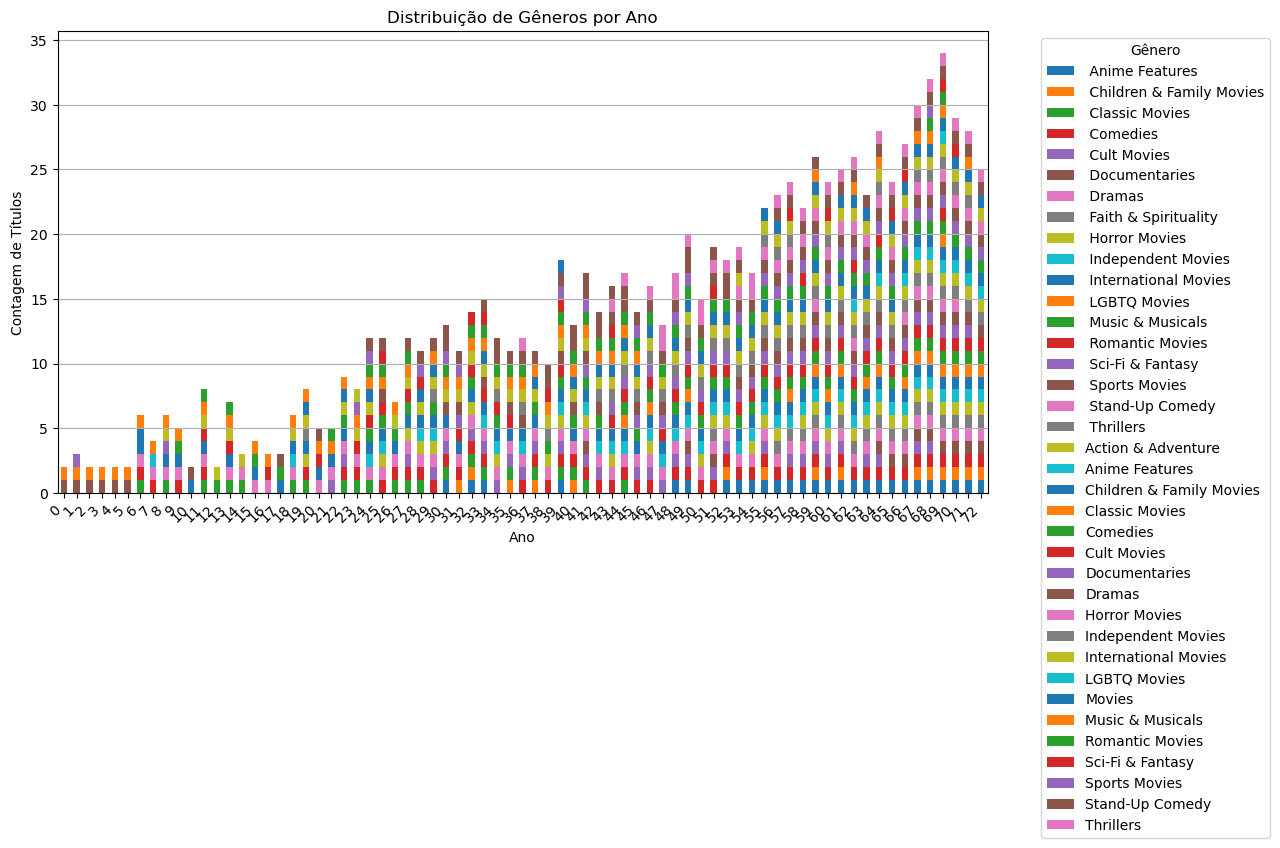

In [17]:
# Agrupamento por ano e contagem de gêneros
generos_por_ano = df.groupby('Ano')['Genero'].apply(lambda x: ','.join(x)).reset_index()

# Gráfico de barras empilhadas para distribuição de gêneros por ano
generos_por_ano['Genero'].str.get_dummies(sep=',').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de Gêneros por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem de Títulos')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


# Cálculo da Similaridade

In [18]:
# Criar uma matriz de similaridade

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Sinopse'])

In [19]:
# Calcular a similaridade do cosseno
similaridade = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [20]:
similaridade

array([[1.        , 0.        , 0.        , ..., 0.        , 0.0162422 ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650215],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.0162422 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650215, ..., 0.        , 0.        ,
        1.        ]])

# Recomendação de Filmes

In [ ]:
# Criando um índice para os títulos
indices = pd.Series(df.index, index=df['Titulo']).drop_duplicates()

In [ ]:
indices.index.value_counts()

In [ ]:
# Verificando somente os titulos duplicados
df[df['Titulo'].duplicated(keep=False)].sort_values(by='Titulo')

In [ ]:
# Função para recomendar filmes
def recomendar_filmes(titulo, similaridade=similaridade):
    # Obter o índice do título
    idx = indices[titulo]
    # Obter a pontuação de similaridade
    pontuacoes = list(enumerate(similaridade[idx]))
    # Ordenar os filmes por ordem de pontuação
    pontuacoes = sorted(pontuacoes, key=lambda x: x[1], reverse=True)
    # Obter as pontuações dos 10 filmes mais similares
    pontuacoes = pontuacoes[1:11]
    # Obter os índices dos filmes
    indices_filmes = [i[0] for i in pontuacoes]
    # Retornar os 10 filmes mais similares
    return df['Titulo'].iloc[indices_filmes]

In [ ]:
# Recomendar filmes
recomendar_filmes('Zodiac')